### Applied Machine Learning 5a

##### Date: May 1 2020
##### Author: Jung Ah Shin 
##### Data source: Digits Dataset (Scikit-Learn)


*RUN A MULTILAYER PERCEPTRON (FEED-FORWARD NEURAL NETWORK) ON DIGITS DATASET (SCIKIT-LEARN)*


In [ ]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation

from keras import regularizers

from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

import keras

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [ ]:
digits = load_digits()

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

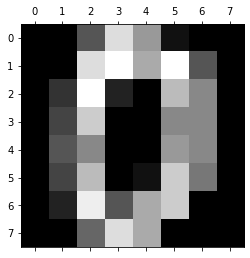

In [ ]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [ ]:
# Preparing data
X = digits.data

y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=64,
                kernel_regularizer = regularizers.l2(0.01),
                activity_regularizer=regularizers.l2(0.01))) # first layer specify shape of input
model.add(Dense(32, activation='relu',
                 kernel_regularizer = regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(10, activation='softmax')) #10 classes 


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#selecting L2 regularization strength and number of hidden units using GridSearchCV

def create_model(optimizer="adam", hidden_size=32, l2_val=0.01):
  model = Sequential([
  Dense(hidden_size, input_dim=64,
          activation='relu',
          kernel_regularizer = regularizers.l2(l2_val)),
  Dense(hidden_size, activation='relu',
          kernel_regularizer = regularizers.l2(l2_val)),
  Dense(10, activation='softmax')])
  model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model



clf = KerasClassifier(build_fn=create_model)
param_grid = {'epochs': [1, 5, 10],
              'hidden_size':[32,64,256],
              'l2_val':[0.001, 0.0001, 0.00001]}

grid = GridSearchCV(clf, param_grid=param_grid,return_train_score=True)
grid.fit(X_train, y_train)

Epoch 1/1
1077/1077 [==============================] - 0s 52us/step
Epoch 1/1
1077/1077 [==============================] - 0s 49us/step
Epoch 1/1
1078/1078 [==============================] - 0s 48us/step
Epoch 1/1
1078/1078 [==============================] - 0s 47us/step
Epoch 1/1
1078/1078 [==============================] - 0s 50us/step
Epoch 1/1
1077/1077 [==============================] - 0s 58us/step
Epoch 1/1
1077/1077 [==============================] - 0s 46us/step
Epoch 1/1
1078/1078 [==============================] - 0s 47us/step
Epoch 1/1
1078/1078 [==============================] - 0s 48us/step
Epoch 1/1
1078/1078 [==============================] - 0s 47us/step
Epoch 1/1
1077/1077 [==============================] - 0s 56us/step
Epoch 1/1
1077/1077 [==============================] - 0s 53us/step
Epoch 1/1
1078/1078 [==============================] - 0s 56us/step
Epoch 1/1
1078/1078 [==============================] - 0s 46us/step
Epoch 1/1
1078/1078 [===========================

GridSearchCV(cv=None, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f77e303bb00>,
             iid='deprecated', n_jobs=None,
             param_grid={'epochs': [1, 5, 10], 'hidden_size': [32, 64, 256],
                         'l2_val': [0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=['param_epochs', 'param_hidden_size', 'param_l2_val'],
                values=['mean_train_score', 'mean_test_score'])

mean_test_score  mean_train_score
param_epochs param_hidden_size param_l2_val                                   
1            32                0.00001              0.354955          0.346486
                               0.00010              0.314743          0.337413
                               0.00100              0.332672          0.342045
             64                0.00001              0.668110          0.678372
                               0.00010              0.706022          0.708426
                               0.00100              0.727581          0.746467
             256               0.00001              0.909456          0.943764
                               0.00010              0.927986          0.944138
                               0.00100              0.931733          0.948773
5            32                0.00001              0.870833          0.903676
                               0.00010              0.869346          0.895511
                               0.00100              0.860421          0.880670
             64                0.00001              0.941347          0.969934
                               0.00010              0.933920          0.972348
                               0.00100              0.936172          0.970307
             256               0.00001              0.968809          0.995733
                               0.00010              0.965111          0.994619
                               0.00100              0.971045          0.997959
10           32                0.00001              0.922057          0.958796
                               0.00010              0.925777          0.964736
                               0.00100              0.916145          0.965847
             64                0.00001              0.956208          0.997031
                               0.00010              0.953975          0.995732
                               0.00100              0.954727          0.996845
             256               0.00001              0.974022          1.000000
                               0.00010              0.978474          1.000000
                               0.00100              0.973284          1.000000

In [ ]:
#evaluation on an independent test-set.

# use best parameters from above
final_model =  create_model(optimizer="adam", hidden_size=256, l2_val=0.00001)
final_model.fit(X_train, y_train, epochs=10,verbose=1)

score = final_model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1347/1347 [==============================] - 0s 149us/step - loss: 0.7017 - accuracy: 0.8010
Epoch 2/10
1347/1347 [==============================] - 0s 81us/step - loss: 0.1873 - accuracy: 0.9362
Epoch 3/10
1347/1347 [==============================] - 0s 95us/step - loss: 0.1069 - accuracy: 0.9636
Epoch 4/10
1347/1347 [==============================] - 0s 91us/step - loss: 0.0503 - accuracy: 0.9881
Epoch 5/10
1347/1347 [==============================] - 0s 84us/step - loss: 0.0229 - accuracy: 0.9963
Epoch 6/10
1347/1347 [==============================] - 0s 80us/step - loss: 0.0148 - accuracy: 0.9985
Epoch 7/10
1347/1347 [==============================] - 0s 86us/step - loss: 0.0118 - accuracy: 0.9993
Epoch 8/10
1347/1347 [==============================] - 0s 87us/step - loss: 0.0085 - accuracy: 1.0000
Epoch 9/10
1347/1347 [==============================] - 0s 83us/step - loss: 0.0070 - accuracy: 1.0000
Epoch 10/10
1347/1347 [==============================] - 0s 84us/step - 

In [ ]:
print("Test loss: {:.3f}".format(score[0]))
print("Test accuracy: {:.3f}".format(score[1]))

Test loss: 0.064
Test accuracy: 0.984
